In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

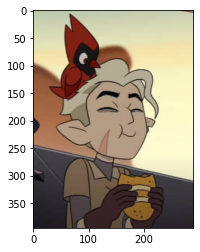

In [2]:
image = cv2.cvtColor(cv2.imread('image_1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

In [4]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

In [5]:
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('Simple approximation', image_copy1)
cv2.waitKey(0)
cv2.imwrite('contours_simple_image1.jpg', image_copy1)
cv2.destroyAllWindows()

In [5]:
img_gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow('SIMPLE Approximation contours', image_copy2)
cv2.waitKey(0)
image_copy3 = image.copy()
for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('CHAIN_APPROX_SIMPLE Point only', image_copy3)
cv2.waitKey(0)
cv2.imwrite('contour_point_simple.jpg', image_copy3)
cv2.destroyAllWindows()

## Function 1

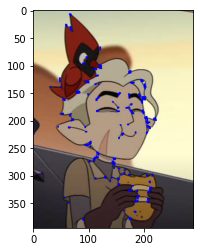

In [6]:
# path to input image specified and
# image is loaded with imread command


# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)

# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]

# the window showing output image with corners
plt.imshow(image)


In [7]:
import cv2
import numpy as np
img = cv2.imread('image_1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines =cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow("edges", edges)
    cv2.imshow("lines", img)
    cv2.waitKey()
    cv2.destroyAllWindows()


TypeError: Invalid shape (3727080,) for image data

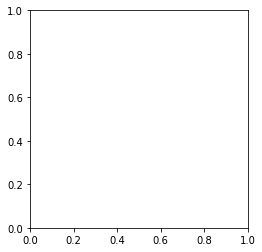

In [8]:
import cv2
hog = cv2.HOGDescriptor()
im = cv2.imread('image_1.jpg')
h = hog.compute(im)
plt.imshow(h, cmap="gray")

(395, 291, 3)
(512, 256, 3)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10040\3530294545.py:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


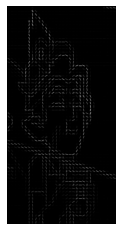

In [12]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = imread('image_1.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")